In [1]:
import time
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import quandl
quandl.ApiConfig.api_key = 'JgrixskwB3MtGDkJtxms'
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Find the Historical Rate of Return for AAPL, IBM, GE, F to give us an idea of the Expected Rate of Return
# RoR for a Security * Weight of the Security in the Portfolio (equally weighted 25% per AAPL, IBM, GE, F)

In [16]:
stocks = ['PG', 'IBM', 'GE', 'F']

In [17]:
portfolio = pd.DataFrame()
for t in stocks:
    portfolio[t] = wb.DataReader(t, data_source='yahoo', start='1995-01-01')['Adj Close']
    time.sleep(20)

In [18]:
portfolio.head()

,PG,IBM,GE,F
Date,,,,
1995-01-03,9.027610,13.099144,4.479902,5.155141
1995-01-04,8.955246,13.210154,4.479902,5.293846
1995-01-05,8.828607,13.143543,4.490882,5.247612
1995-01-06,8.846698,13.343360,4.468922,5.247612
1995-01-09,8.810512,13.409963,4.425002,5.340079


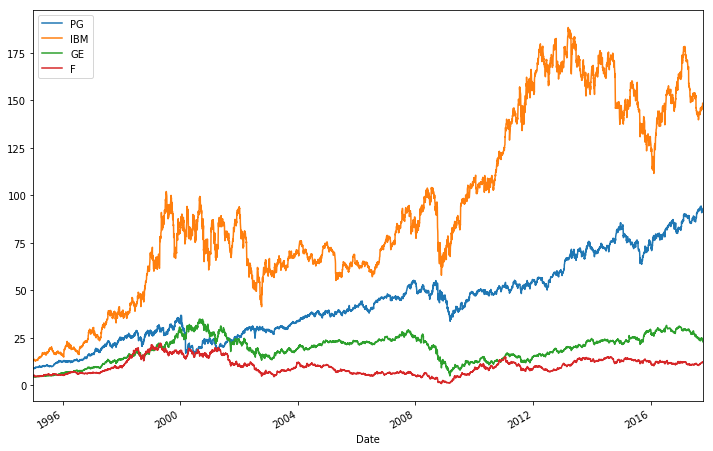

In [19]:
portfolio.plot(figsize=(12,8));

In [20]:
portfolio.to_csv('portfolio.csv')

In [21]:
portfolio.iloc[0]

PG      9.027610
IBM    13.099144
GE      4.479902
F       5.155141
Name: 1995-01-03 00:00:00, dtype: float64

In [44]:
portfolio.loc['1995-01-03']

PG      9.027610
IBM    13.099144
GE      4.479902
F       5.155141
Name: 1995-01-03 00:00:00, dtype: float64

In [22]:
# Normalize the data to 100

In [23]:
portfolio_normalized = (portfolio/portfolio.iloc[0])*100

In [24]:
portfolio_normalized.head()

,PG,IBM,GE,F
Date,,,,
1995-01-03,100.000000,100.000000,100.000000,100.000000
1995-01-04,99.198415,100.847460,100.000000,102.690615
1995-01-05,97.795618,100.338946,100.245095,101.793763
1995-01-06,97.996014,101.864366,99.754905,101.793763
1995-01-09,97.595177,102.372819,98.774527,103.587448


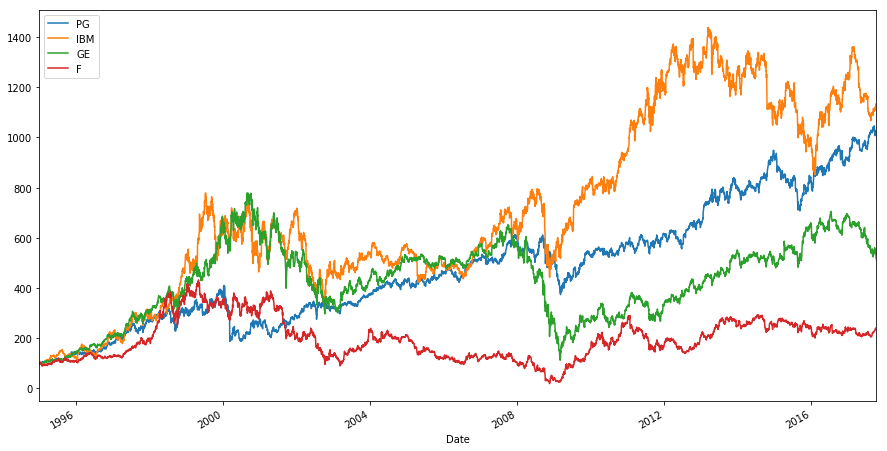

In [43]:
portfolio_normalized.plot(figsize=(15,8));

In [45]:
portfolio_rets = (portfolio/portfolio.shift(1))-1

In [46]:
portfolio_rets.head()

,PG,IBM,GE,F
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.008475,0.000000,0.026906
1995-01-05,-0.014141,-0.005042,0.002451,-0.008734
1995-01-06,0.002049,0.015203,-0.004890,0.000000
1995-01-09,-0.004090,0.004991,-0.009828,0.017621


In [48]:
weights = np.array([0.25,0.25,0.25,0.25])

In [52]:
np.dot(portfolio_rets,weights)

array([        nan,  0.00684122, -0.00636658, ..., -0.00522347,
       -0.00458025,  0.00033047])

In [53]:
portfolio_annual_ret = portfolio_rets.mean()*250

In [54]:
portfolio_annual_ret

PG     0.127130
IBM    0.143767
GE     0.113538
F      0.117532
dtype: float64

In [55]:
np.dot(portfolio_annual_ret, weights)

0.12549158985347422

In [56]:
pfolio_1 = str(round(np.dot(portfolio_annual_ret, weights), 5) * 100) + "%"

In [57]:
pfolio_1

'12.549%'

In [60]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [61]:
pfolio_2 = str(round(np.dot(portfolio_annual_ret, weights_2), 5) * 100) + "%"

In [63]:
print(pfolio_1, pfolio_2)

12.549% 13.127%
